In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
g = 9.81
Rearth = 6378000.0

In [3]:
lon = np.linspace(-120, -60, 361)
lat = np.linspace(-60, 0, 361)
lon, lat = np.meshgrid(lon,lat,indexing='ij')
nx = lon.shape[0]
ny = lat.shape[0]
dlon = np.diff(lon[:,0])[0]
dlat = np.diff(lat[0,:])[0]

In [4]:
def torad(s):
    return s*np.pi/180.0

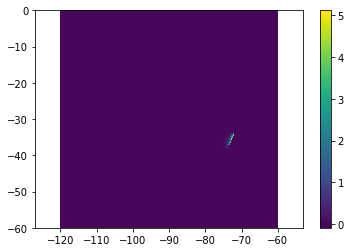

In [5]:
# h = 4000*np.ones((nx,ny))
h = np.loadtxt('../validation/03_pacific_south_america/data/bathymetry_SA').T
h = np.where(h<=0,0.0,h)
r2 = 1
etainit = np.loadtxt('../validation/03_pacific_south_america/data/easyWave_midtop_initialcondition').T
plt.pcolormesh(lon,lat,etainit)

plt.axis('equal')
plt.colorbar()

In [6]:
latrad = torad(lat)
dlonrad = torad(dlon)
dlatrad = torad(dlat)
ds = dlonrad
Dx = Rearth*dlonrad
dt = 0.25*np.min(np.cos(latrad)*Dx/np.sqrt(g*h.max()))

In [7]:
latip = np.zeros((nx+1,ny))
latip[1:,:] = latrad
latip[0,:] = latrad[0,:]

latjp = np.zeros((nx,ny+1))
latjp[:,1:] = torad(lat+dlat*0.5)
latjp[:,0] = torad(lat[0,:].min()-0.5*dlat)

hip = np.zeros((nx+1,ny))
hip[1:-1,:] = 0.5*(h[1:,:]+h[:-1,:])
hip[0,:] = h[0,:]
hip[-1,:] = h[-1,:]

hjp = np.zeros((nx,ny+1))
hjp[:,1:-1] = 0.5*(h[:,1:]+h[:,:-1])
hjp[:,0] = h[:,0]
hjp[:,-1] = h[:,-1]

In [8]:
#lat[0,:]+lon[:,0]

In [9]:
poiloc = np.array([-86.374, -17.984 ])
poipixel = np.argmin(np.abs(poiloc[0]-lon[:,0])),np.argmin(np.abs(poiloc[1]-lat[0,:]))
poival = np.zeros((int(8*60*60/dt),2))

In [10]:
H0 = H1 = np.zeros((nx+2,ny+2))
H0[1:-1,1:-1] = H1[1:-1,1:-1] = etainit
M0 = M1 =  np.zeros((nx+1  ,ny)) # M[i,j] = M_{i+1/2,j}, i=0..nx, j = 0..ny-1
N0 = N1 =  np.zeros((nx  ,ny+1)) # N[i,j] = N_{i,j+1/2}, i=0..nx-1, j=0..ny-1

In [11]:
t = 0.0

for n in range(int(8*60*60/dt)):
    if n%100==0: print(n)
    t += dt
    H0 = np.copy(H1)
    M0 = np.copy(M1)
    N0 = np.copy(N1)
    
    H1[1:-1,1:-1] = H0[1:-1,1:-1]-dt/(Rearth*np.cos(latrad)*ds)*(M0[1:,:]-M0[:-1,:] \
                                            + N0[:,1:]*np.cos(latjp[:,1:]) - N0[:,:-1]*np.cos(latjp[:,:-1]))

    M1 = M0 -dt*g*hip/(Rearth*np.cos(latip)*dlonrad)*(H1[1:,1:-1]-H1[:-1,1:-1])
    N1 = N0 -dt*g*hjp/(Rearth*dlatrad)*(H1[1:-1,1:]-H1[1:-1,:-1])
    

    
    poival[n,0] = t
    poival[n,1] = H1[poipixel[0]+1,poipixel[1]+1]

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400


In [12]:
dart = np.loadtxt('../validation/03_pacific_south_america/comparison/32412_notide_2010.txt')

(150.0, 360)

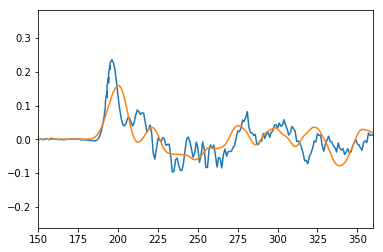

In [14]:
plt.plot(dart[:,0]/60,dart[:,1])
plt.plot(poival[:,0]/60,poival[:,1])
plt.xlim(2.5*60,6*60)

# Serial (non vectorized) code

    for n in range(20):
        print(n)
        for i in range(1,nx+1):
            for j in range(1,ny+1):            
                H1[i,j] = H0[i,j] -dt/(Rearth*np.cos(latrad[i-1,j-1])*dlonrad) * \
                            (M0[i,j-1]-M0[i-1,j-1]  + \
                            N0[i-1,j]*np.cos(latjp[i-1,j]) - N0[i-1,j-1]*np.cos(latjp[i-1,j-1]) ) 

        for i in range(nx+1):
            for j in range(ny):    
                M1[i,j] = M0[i,j] - dt*g*hip[i,j]/(Rearth*np.cos(latip[i,j])*dlonrad)*(H1[i+1,j]-H1[i,j])

        for i in range(nx):
            for j in range(ny+1):
                N1[i,j] = N0[i,j] -dt*g*hjp[i,j]/(Rearth*dlatrad)*(H1[i,j+1]-H1[i,j])

        H0 = np.copy(H1)
        M0 = np.copy(M1)
        N0 = np.copy(N1)